In [ ]:
import tensorflow as tf
import os
import cv2
data_dir=r"C:\Mini_Project\Main\Plant_Dataset-2"
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
data=tf.keras.utils.image_dataset_from_directory(data_dir,image_size=(256, 256),color_mode='grayscale',
    batch_size=64,shuffle=True)
data_iterator=data.as_numpy_iterator()
class_names=data.class_names
print(class_names)

Found 2428 files belonging to 7 classes.
['Curry leaf', 'Neem', 'Potato', 'Pumpkin', 'cucumber', 'lemon', 'tomato']


In [ ]:
data=data.map(lambda x,y: (x/255, y),num_parallel_calls=tf.data.AUTOTUNE) #normalize
scaled_iterator=data.as_numpy_iterator()

In [4]:
batch=scaled_iterator.next()

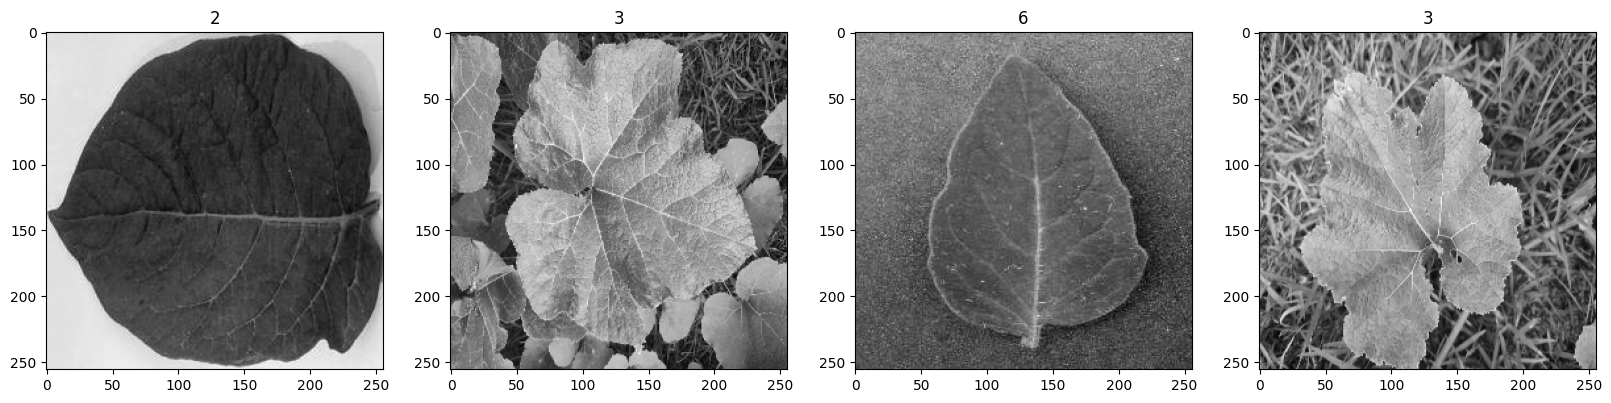

In [5]:
fig, ax= plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img,cmap=plt.cm.gray)
    ax[idx].title.set_text(batch[1][idx])

In [6]:
train_size=int(len(data)*0.7)
val_size=int(len(data)*0.2)+1
test_size=int(len(data)*0.1)

In [7]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size + val_size).take(test_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,GlobalAveragePooling2D,Dropout,Flatten
from tensorflow.keras.optimizers import Adam

model=Sequential()
model.add(Conv2D(16,(3,3),activation="relu",input_shape=(256,256,1)))
model.add(MaxPool2D())
model.add(Dropout(0.3))

model.add(Conv2D(32,(3,3),strides=1,activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.5))

model.add(Conv2D(16,(3,3),strides=1,activation="relu"))
model.add(MaxPool2D())

model.add(Flatten())
optimizer=Adam()
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(7,activation='softmax'))
model.compile(optimizer=optimizer,loss=tf.losses.sparse_categorical_crossentropy,metrics=["accuracy"])

model.summary()

C:\Users\Jasim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,697,879 (14.11 MB)

 Trainable params: 3,697,879 (14.11 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
call_back_dir=rf"C:\Mini_Project\Main\model_checkpoint"
call_back_dir=os.path.join(call_back_dir,datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+'.keras.weights.h5')
Checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(filepath=call_back_dir,save_weights_only=True)
early_stop=EarlyStopping(monitor="val_loss",patience=3,restore_best_weights=True)

In [10]:
hist=model.fit(train, epochs=10, validation_data=val,callbacks=[Checkpoint_callback,early_stop])

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.1685 - loss: 3.4054 - val_accuracy: 0.1504 - val_loss: 1.9216
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.1899 - loss: 1.8931 - val_accuracy: 0.2520 - val_loss: 1.7153
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.3955 - loss: 1.4663 - val_accuracy: 0.5625 - val_loss: 1.2673
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.5984 - loss: 1.0036 - val_accuracy: 0.6680 - val_loss: 0.9485
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.7048 - loss: 0.7609 - val_accuracy: 0.8184 - val_loss: 0.6597
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.7545 - loss: 0.6603 - val_accuracy: 0.7598 - val_loss: 0.6428
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.8003 - loss: 0.5432 - val_accuracy: 0.8301 - val_loss: 0.5049
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.8142 - loss: 0.5365 - val_accuracy: 0.8125 - val_loss:

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
    
datagen = ImageDataGenerator(
    rescale=1/255,
    validation_split=0.2)
    

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse',
    color_mode='grayscale',    
    subset='training')

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse',
    color_mode='grayscale',
    subset='validation')

hist = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator),
    callbacks=[Checkpoint_callback,early_stop]
)

Found 1944 images belonging to 7 classes.
Found 484 images belonging to 7 classes.


C:\Users\Jasim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.8667 - loss: 0.3717 - val_accuracy: 0.7645 - val_loss: 0.6184
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.8900 - loss: 0.3260 - val_accuracy: 0.8450 - val_loss: 0.4304
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9067 - loss: 0.2594 - val_accuracy: 0.8347 - val_loss: 0.4322
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9128 - loss: 0.2519 - val_accuracy: 0.8161 - val_loss: 0.4997
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.8951 - loss: 0.3045 - val_accuracy: 0.7169 - val_loss: 0.7326
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.9222 - loss: 0.2087 - val_accuracy: 0.7975 - val_loss: 0.5165
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.9355 - loss: 0.1629 - val_accuracy: 0.7831 - val_loss: 0.5920
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9510 - loss: 0.1272 - val_accuracy: 0.8678 - val_loss

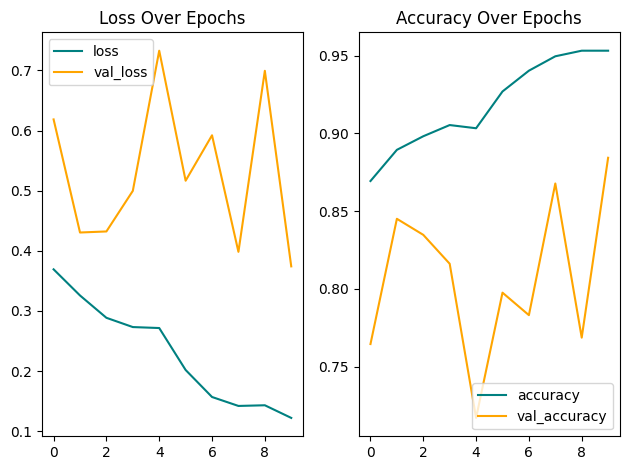

In [28]:
fig,ax=plt.subplots(1,2,)
ax[0].plot(hist.history['loss'],color='Teal',label="loss")
ax[0].plot(hist.history['val_loss'],color='orange',label='val_loss')
ax[0].set_title("Loss Over Epochs")
ax[0].legend(loc='upper left')

ax[1].plot(hist.history['accuracy'],color='Teal',label="accuracy")
ax[1].plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
ax[1].set_title("Accuracy Over Epochs")
ax[1].legend(loc="lower right")
plt.tight_layout()
plt.show()

In [30]:
ypred=[]
yorg=[]
for batch in train.as_numpy_iterator():
    x,y = batch
    ypredapp=model.predict(x)
    ypred.append(ypredapp.argmax(axis=1))
    yorg.append(y)

ypred = np.concatenate(ypred, axis=0)
yorg = np.concatenate(yorg, axis=0)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 229ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 

In [31]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
print(classification_report(yorg, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       233
           1       0.99      1.00      1.00       268
           2       0.98      0.93      0.96       323
           3       0.91      0.99      0.95       178
           4       0.95      0.87      0.90       231
           5       1.00      0.99      1.00       150
           6       0.92      0.99      0.96       281

    accuracy                           0.96      1664
   macro avg       0.96      0.97      0.96      1664
weighted avg       0.97      0.96      0.96      1664



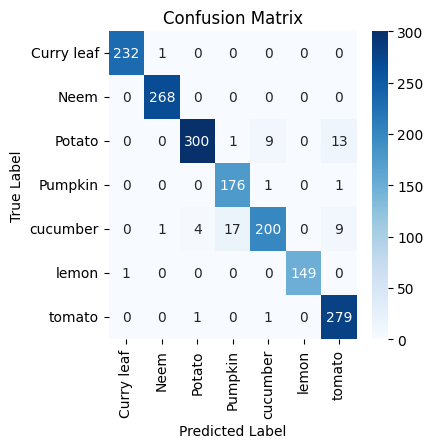

In [32]:
cm = confusion_matrix(yorg, ypred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",xticklabels=class_names,yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [33]:
ypred=[]
yorg=[]
for batch in train.as_numpy_iterator():
    x,y = batch
    ypredapp=model.predict(x)
    ypred.append(ypredapp.argmax(axis=1))
    yorg.append(y)

ypred = np.concatenate(ypred, axis=0)
yorg = np.concatenate(yorg, axis=0)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 262ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


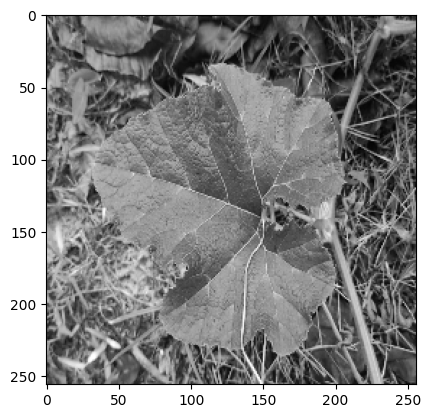

3
Pumpkin
['Curry leaf', 'Neem', 'Potato', 'Pumpkin', 'cucumber', 'lemon', 'tomato']


In [ ]:
img=cv2.imread(r"C:\Mini_Project\Main\model sample\pumpkin.jpg",cv2.IMREAD_COLOR)
resize=cv2.resize(img, (256,256))
gray=tf.image.rgb_to_grayscale(resize)/255
ypred=model.predict(np.expand_dims(gray,0))
plt.imshow(gray,cmap='gray')
plt.show()
op=np.argmax(ypred,axis=1)
op=int(op.item())
print(op)
print(class_names[op])
print(class_names)

In [ ]:
save_dir=r"C:\Mini_Project\Main\model_saved"
ext_data=datetime.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
new_dir=os.path.join(save_dir,ext_data)

In [36]:
os.makedirs(new_dir,exist_ok=True)
model_dir=os.path.join(new_dir,'dr_grow_newdataset.keras')
model.save(model_dir)
print(model_dir)

C:\Users\Jasim\files\codes\DrGrow\model_saved\2025-03-17-19-58-45\dr_grow_newdataset.keras


In [37]:
#model.load_weights(r'C:\Users\Jasim\files\codes\DrGrow\model_checkpoint.keras.weights.h5')